In [1]:
!pip install mglearn

     |████████████████████████████████| 542kB 17.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=acbbf144266893a322ac2b9ac3640a091d9184eaf5e6c575301b814577691205
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


# 지도학습 - 선형회귀 (Linear Regression)

회귀 모델이란?

- 어떤 자료에 대해서 그 값에 영향을 주는 조건을 고려하여 구한 평균 <br>
(어떤 데이터들이 굉장히 크거나 작을지라도 전체적으로 이 데이터들은 전체 평균으로 회귀하려는 특징이 있다는 통계학 기법)


- \\( y = h(x_1, x_2, x_3, ..., x_k; W_1, W_2, W_3, ..., W_k) + \epsilon \\)

 - h() : 조건에 따른 평균을 구하는 함수 (회귀 모델)
 - x : 어떤 조건(특성)
 - W : 각 조건의 영향력(가중치)
 - e : ‘오차항’을 의미. 다양한 현실적인 한계로 인해 발생하는 불확실성으로 일종의 잡음(noise)

선형 모델이란?

- 입력 특성에 대한 선형 함수를 만들어 예측을 수행

- 다양한 선형 모델이 존재

- 분류와 회귀에 모두 사용 가능


<center>

시험성적 데이터

|X ( 학습 시간 )| Y ( 시험 점수 )|
|---|---|
|9 |90|
|8 |80|
|4| 40|
|2| 20|

7시간 공부 할 경우 성적은?
</center>



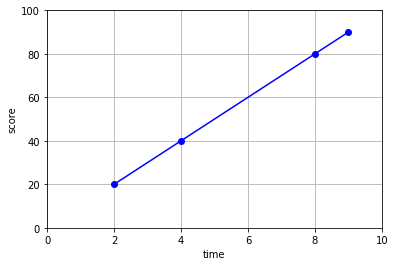

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [2,4,8,9]
y = [20,40,80,90]
plt.plot(x,y,'b-o')
plt.xlim(0,10)
plt.ylim(0,100)
plt.xlabel('time')
plt.ylabel('score')
plt.grid()
plt.show()

 \\( y=ax+b \\)

 - a : 기울기
 - b : 절편

<center>

시험성적 데이터

|X ( 학습 시간 )| Y ( 시험 점수 )|
|---|---|
|8 |97|
|6 |91|
|4| 93|
|2| 81|

7시간 공부 할 경우 성적은?
</center>



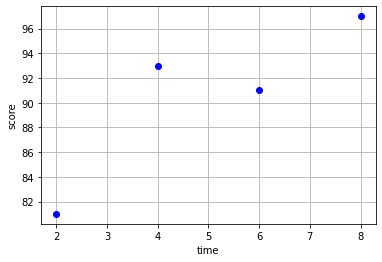

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
x = [2,4,6,8]
y = [81,93,91,97]
plt.plot(x,y,'bo')

plt.xlabel('time')
plt.ylabel('score')
plt.grid()
plt.show()

# y = ax  + b 

 \\( y=ax+b \\)

 - a : 기울기
 - b : 절편

최소제곱법

> \\( a=\frac { (x-x평균)(y-y평균)의 합 }{ { (x-x평균) }^{ 2 }의 합 }  \\)

- 공부한 시간(x)의 평균: (2+4+6+8) / 4 = 5
- 성적(y)의 평균: (81+93+91+97) / 4 = 90.5

> \\( b=y의 평균- (x의 평균 \times 기울기 a) \\)

- b = 90.5 - (2.3 x 5) = 79


In [4]:
a = ( (2-5)*(81-90.5)+(4-5)*(93-90.5)+(6-5)*(91-90.5)+(8-5)*(97-90.5) )  /  ( (2-5)**2 + (4-5)**2 + (6-5)**2 + (8-5)**2 )
a1 = ( (2-5)*(81-90.5)+(4-5)*(93-90.5)+(6-5)*(91-90.5)+(8-5)*(97-90.5) ) 
a2 = ( (2-5)**2 + (4-5)**2 + (6-5)**2 + (8-5)**2 )
a1, a2, a

(46.0, 20, 2.3)

2.3
79.0


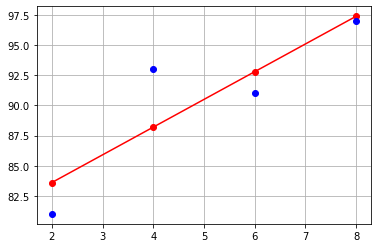

In [5]:
# 오차가 최저가 되는 직선
import numpy as np
# 기울기 a를 최소제곱법으로 구하는 함수
def compute_a(x, y, mean_x, mean_y):
  a = np.sum((x- mean_x) * (y-mean_y)) / np.sum(np.square(x-mean_x))
  b = mean_y - (mean_x * a)
  return a , b


mx = np.mean(x)
my = np.mean(y)

a,b = compute_a(x,y,mx,my)
print(a)
print(b)

y1= [a * x + b for x in x]

plt.plot(x,y1,'r-o')
plt.plot(x,y,'ro',c = 'blue')
plt.grid()

## 선형회귀(Linear Regression) <br>
 또는 최소제곱법(Ordinary Least Squares)

- 종속변수(응답변수) y와 한 개 이상의 독립변수(입력변수) x와의 상관관계를 모델링한 것

 >  \\( y=Wx+b \\)  
  - (W : 가중치, b : 편향(bias))

 > \\( H(x)=Wx+b \\)  
  - H(x) : Linear 하게 Hypothesis(가설)을 세운다는 것
  - 데이터를 가장 잘 대변할 수 있는 H(x)의 W와 b를 정하는 것이 Linear Regression의 목적

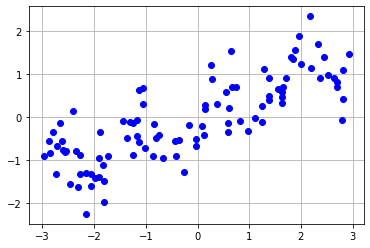

In [6]:
import numpy as np
import mglearn

x,y = mglearn.datasets.make_wave(n_samples=100)

plt.plot(x,y,'ro',c ='blue') #이럴때 선형 함수를 어떻게 적용할 것인가
plt.grid()


w[0]: 0.393906  b: -0.031804


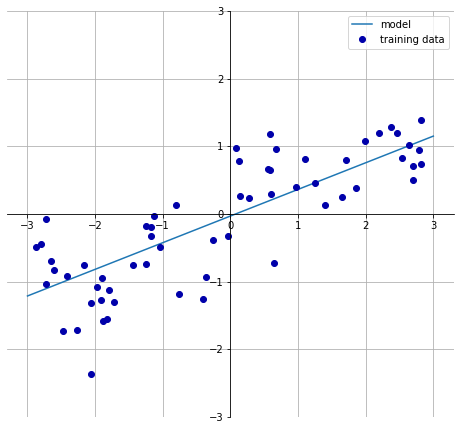

In [7]:
import mglearn
mglearn.plots.plot_linear_regression_wave() #모델이랑 데이터를 전부 보여주는 그래프 

- 비용함수 (Cost / Cost function) : 그려진 직선 Hypothesis(H(x))와 실제 데이터(y)의 차이

  - Cost = H(x) - y에 데이터를 대입하여 Cost의 총합을 구하는 것이 가능
  - Cost의 총합이 작은 Hypothesis일수록 데이터를 잘 대변하는 훌륭한 Linear Regression
  - Cost는 양수일 수도, 음수일 수도 있기에 이러한 문제를 방지하고자 총합을 구할 때 Cost값을 제곱하여 평균을 내는 방식(평균제곱오차, MSE, Mean Squared Error)을 사용
  >  \\( cost(W,b)=\cfrac { 1 }{ m } \sum _{ i=1 }^{ m } { (H({ x }^{ (i) })-{ y }^{ (i) }) }^{ 2 }  \\)

   > \\( H(x)=Wx+b \\)  

 - 머신러닝(or 딥러닝)에서 learning의 목적은 Cost를 정의하고 이를 최소화하는 것

 - 절대값보다 제곱을 많이 쓰는 이유 
 속도가 훨씬 빠르다.
 절댓값은 음수인지 판단하는 연산을 해야 한다,

#### 평균제곱오차 (MSE, Mean Squared Error) - 잘못그은 선 바로잡기

- 실제값과 예측값의 차이를 분석하기 위한 것
- 음수가 존재하는 경우 오차가 줄어드는 문제 -> 자승을 취함
- 평균오차가 자승으로 인해 커지는 문제 -> 제곱근을 취함

|x(hour) | y(score)|
|---|---|
|0|0|
|1|1|
|2|2|
|3|3|

\\( H(x)=1 \times  x+0 \\)  

\\( H(x)=0.5 \times x+0 \\)  

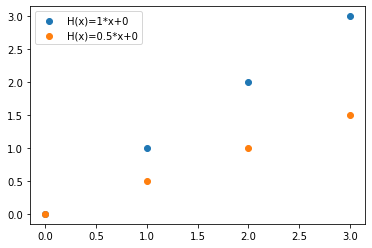

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 2, 3])

# 가중치(계수) 및 편향(절편)
w = 1
b = 0
y_pred1 = w * x + b
plt.scatter(x, y_pred1,label='H(x)=1*x+0')
#plt.plot(x, y_pred,'r--o')

w = 0.5
b = 0
y_pred2 = w * x + b
plt.scatter(x, y_pred2 ,label='H(x)=0.5*x+0')
#plt.plot(x, y_pred)

plt.legend()
plt.show()

#### 평균제곱오차 (MSE, Mean Squared Error) 연습 01
가설의 MSE 값을 계산해보자.


\\( \cfrac { { (H({ x }^{ (1) })-{ y }^{ (1) }) }^{ 2 } + { (H({ x }^{ (2) })-{ y }^{ (2) }) }^{ 2 }+ { (H({ x }^{ (3) })-{ y }^{ (3) }) }^{ 2 }+ { (H({ x }^{ (4) })-{ y }^{ (4) }) }^{ 2 } }{ 4 } = ? \\)

In [9]:
# y_pred(예측값), y(실제값)
def MSE(y_pred, y):
  cost = np.sum((y_pred - y) ** 2) / len(y)
  return cost

mse = MSE(y_pred1,y)
print(mse) #오차가 존재 하지 않으므로 0 

mse = MSE(y_pred2,y)
print(mse)

0.0
0.875


#### 경사하강법 (Gradient descent algorithm) - 오차 수정하기

어떻게 비용함수 값이 최소가 되는 W 파라미터를 구할 수 있을까?

- 점진적인 하강, 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트 하면서 오류 값이 최소가 되는 값을 구하는 방식

- 함수의 기울기(경사)를 구하여 기울기가 낮은 쪽으로 
계속 이동하여 값을 최적화 시키는 방법 <br> (오차 (기울기)가 가장 작은 방향으로 이동시키는 방법)


learning_rate(학습 속도)란?

- W와 b의 미분 값(W_grad, b_grade)을 얼마만큼 반영할지를 결정하는 값.
- 주로 0.001, 0.00001과 같은 매우 작은 값을 사용하며 learning_rate가 클수록 변화가 빠르며, learning_rate가 작을수록 변화가 느리다고 예상.
- 꼭 변화가 빠르다고 해서 결과를 빨리 볼 수 있는 것은 아님.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
w_val = []
cost_val = []
xx_val = []

sample = 200

x = np.random.randn(sample)
#print(x)
y = 2*x + 4 + np.random.randn(sample)
#np.random.randn = y에서는 노이즈 값을 추가 

#plt.scatter(x,y)
 
epoch = 10 #반복 횟수 
lr = 0.7 #학습률

w = np.random.uniform() #0~1 사이 값 랜덤하게 나오는 uniform 
b = np.random.uniform()
print(w,b)


for epoch in range(epoch):
  y_pred = w * x + b #예측값 
  cost = MSE(y_pred,y) #비용 함수 계산 
  #cost_val.append(cost)
  xx = lr * ((y_pred - y) * x).mean()
  print(f'{epoch:2} w = {w:.6f}, b = {b:.6f},cost = {cost:.6f}, lr * ((y_pred - y) *x).mean() = {xx:.6f}')
  w = w -xx
  b = b - lr * (y_pred - y).mean()
  w_val.append(w)
  cost_val.append(cost)
  xx_val.append(xx)




0.7898238544977653 0.22084664284751987
 0 w = 0.789824, b = 0.220847,cost = 15.808383, lr * ((y_pred - y) *x).mean() = -0.780911
 1 w = 1.570734, b = 2.776887,cost = 2.440577, lr * ((y_pred - y) *x).mean() = -0.278227
 2 w = 1.848962, b = 3.558185,cost = 1.152135, lr * ((y_pred - y) *x).mean() = -0.096728
 3 w = 1.945690, b = 3.797735,cost = 1.027019, lr * ((y_pred - y) *x).mean() = -0.033034
 4 w = 1.978724, b = 3.871395,cost = 1.014794, lr * ((y_pred - y) *x).mean() = -0.011130
 5 w = 1.989854, b = 3.894105,cost = 1.013593, lr * ((y_pred - y) *x).mean() = -0.003711
 6 w = 1.993565, b = 3.901125,cost = 1.013475, lr * ((y_pred - y) *x).mean() = -0.001227
 7 w = 1.994792, b = 3.903300,cost = 1.013463, lr * ((y_pred - y) *x).mean() = -0.000403
 8 w = 1.995195, b = 3.903975,cost = 1.013462, lr * ((y_pred - y) *x).mean() = -0.000132
 9 w = 1.995327, b = 3.904185,cost = 1.013462, lr * ((y_pred - y) *x).mean() = -0.000043


#### LinearRegression 실습 01

배달시간 예측
- 설정 거리의 장소에 배달하려면 얼마나 걸리는지 예측

In [11]:
import numpy as np 
from matplotlib import pyplot as plt 

(0.0, 450.0)

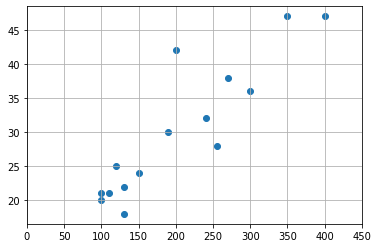

In [12]:
# 배달거리와 배달시간 데이터
data = np.array([
    [100, 20], 
		[150, 24], 
		[300, 36], 
		[400, 47], 
		[130, 22], 
		[240, 32],
		[350, 47], 
		[200, 42], 
		[100, 21], 
		[110, 21], 
		[190, 30], 
		[120, 25], 
		[130, 18], 
		[270, 38], 
		[255, 28]])

x = data[:, 0]
y = data[:, 1]

plt.scatter(x,y)
plt.grid()
plt.xlim(0,450)

No handles with labels found to put in legend.


0.09229753862877553 11.330266325025235
[20 24 36 47 22 32 47 42 21 21 30 25 18 38 28]
[20.560020187902786, 25.174897119341566, 39.019527913657896, 48.24928177653545, 23.328946346766052, 33.481675595931364, 43.63440484509667, 29.78977405078034, 20.560020187902786, 21.482995574190543, 28.866798664492585, 22.4059709604783, 23.328946346766052, 36.25060175479463, 34.866138675363]


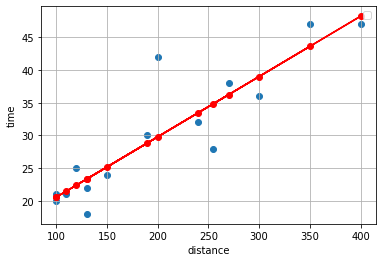

In [13]:
# 기울기 a를 최소제곱법으로 구하는 함수
def compute_a(x, y, mean_x, mean_y):
    # 분자 부분
    divup = np.sum((x-mean_x) * (y-mean_y))
    # 분모 부분 
    divunder = np.sum(np.square(x-mean_x))
    return divup/divunder
  

# 기울기
w = compute_a(x,y,np.mean(x),np.mean(y))
# 절편
b = np.mean(y) - (np.mean(x) * w)

print(w,b)

y1 = [w*x+b for x in x]
print(y)
print(y1)
plt.scatter(x,y)
plt.plot(x,y1,'r-o')
plt.grid()
plt.xlabel('distance')
plt.ylabel('time')
plt.legend()
plt.show()

- 예측하기 (거리가 350인경우 배달시간)

In [14]:
predict_350 = w*350+b
print(predict_350)

43.63440484509667


#### 일반 선형회귀

예측값과 실제 값의 cost를 최소화할 수 있도록 W(가중치, 회귀계수)를 최적화하며, 규제(Regularization)를 적용하지 않은 모델

단순 선형회귀 (Simple Linear Regression)
> \\( H({ x })={ W }{ x }+b \\)

다변수 선형회귀 (Multi-variable Linear Regreesion)
> 변수가 3개 일때의 H(x) <br>
> \\( H({ x }_{ 1 },{ x }_{ 2 },{ x }_{ 3 })={ W }_{ 1 }{ x }_{ 1 }+{ W }_{ 2 }{ x }_{ 2 }+{ W }_{ 3 }{ x }_{ 3 }+b \\)

> 변수가 n개 일때의 H(x) <br>
>  \\( H({ x }_{ 1 },{ x }_{ 2 },{ x }_{ 3 },\dots ,{ x }_{ n })={ W }_{ 1 }{ x }_{ 1 }+{ W }_{ 2 }{ x }_{ 2 }+{ W }_{ 3 }{ x }_{ 3 }+\dots +{ W }_{ n }{ x }_{ n }+b \\)

다항 회귀 (Polynomial Regreesion)
> 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것 <br>
> 차수가 높아질수록 과적합의 문제가 발생
학습데이터 가 너무 잘맞춰짐  = 모델의 복잡도 가 높아짐 


(100, 1)
(100, 1)
[[-1.45877139]
 [-0.01788315]
 [-2.81179521]
 [-0.76730315]
 [ 2.15197267]
 [ 2.74060501]
 [ 1.69932972]
 [-1.67705115]
 [ 0.80472967]
 [-0.5975814 ]
 [ 2.50841642]
 [-2.99848779]
 [-0.05135119]
 [ 0.04691361]
 [ 0.07051187]
 [-1.17377397]
 [-1.47648243]
 [ 2.93804116]
 [-0.12905832]
 [-1.15109299]
 [-1.60547392]
 [-1.79676142]
 [-0.10328759]
 [-2.69424634]
 [-1.47327203]
 [-0.99491338]
 [-2.0538132 ]
 [-2.65496614]
 [-0.92055656]
 [ 2.17903108]
 [ 0.08778093]
 [ 0.24528367]
 [-2.41513946]
 [-1.72183963]
 [ 2.7894879 ]
 [-1.79880622]
 [ 0.26709699]
 [-2.81478362]
 [ 0.38124098]
 [ 2.48728938]
 [ 1.71302292]
 [-0.35382318]
 [ 2.19381037]
 [ 1.11510459]
 [-0.10799273]
 [ 1.97998157]
 [ 0.28138334]
 [ 0.15612487]
 [-1.33748551]
 [-0.25276577]
 [-0.91881095]
 [-0.98854297]
 [ 0.88635874]
 [ 1.11746475]
 [ 1.07468863]
 [-0.14325297]
 [ 2.55860641]
 [ 1.40418698]
 [-2.88647865]
 [-0.11775459]
 [-0.91471095]
 [ 2.67240685]
 [ 2.91426402]
 [ 2.79230897]
 [ 2.77858697]
 [ 2.69

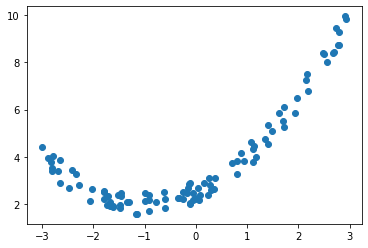

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#다항회귀 실습
n = 100
x = 6 * np.random.rand(n,1) - 3
y = 0.5 * x**2 + x + 2 + np.random.rand(n,1)
print(x.shape)
print(y.shape)

print(x)
print('--------------------------------')
print(y)
plt.scatter(x,y)
plt.show()

In [16]:
from sklearn.preprocessing import PolynomialFeatures #데이터 전처리 선형 모델을 -> 다항 모델로 전처리 를 시킬수 있다.
poly_features = PolynomialFeatures(degree= 2,include_bias=False) #차수는 2차식 bias 포함 여부 = False -> 그래프가 무난해준다.

x_poly = poly_features.fit_transform(x)
x_poly.shape , x.shape

#print(x_poly) #특성을 하나 더 늘릴수 있다. 곡선 모델을 예측 하기 위해  하나의 x 값으로는 직선 형태로만 나온다.
#print(x)


((100, 2), (100, 1))

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_poly,y)
model.coef_ , model.intercept_ #(가중치 , 절편)

(array([[0.99281699, 0.50351256]]), array([2.49319293]))

#### LinearRegression 실습 02

wave 데이터셋에 선형회귀 적용

LinearRegression()
```
LinearRegression(fit_intercept, normalize, copy_X, n_jobs)
```
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- normalize : 매개변수 무시 여부
- copy_X : X의 복사 여부
- n_jobs : 계산에 사용할 작업 수 (속도를 늘리기 위한 병렬 처리 수)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import mglearn

x, y = mglearn.datasets.make_wave(60)

train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 42)

model = LinearRegression()
model.fit(train_x,train_y)
print('가중치:',model.coef_)
print('절편: ',model.intercept_)
#predict = model.predict(x_test)

train_score = model.score(train_x,train_y)
test_score = model.score(test_x,test_y)

print('학습점수:',train_score)
print('테스트 점수:',test_score)



가중치: [0.39390555]
절편:  -0.031804343026759746
학습점수: 0.6700890315075756
테스트 점수: 0.65933685968637


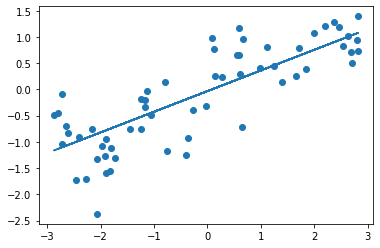

In [19]:
plt.scatter(x,y)
y_new = [model.coef_ * x + model.intercept_ for x in x]
plt.plot(x,y_new)

#### LinearRegression 실습 03 - 1
변수가 1개인 경우

(200,)
1
(200,)


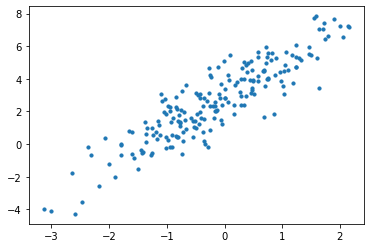

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



# 계수 및 절편
# 노이즈
sample = 200
x = np.random.randn(sample) 
print(x.shape)
print(x.ndim)

w = 2
b = 3
y = w*x+b + np.random.randn(sample)
print(y.shape)
plt.scatter(x,y,s =10)

In [21]:
# 피어슨 상관계수 값을 계산
# 그래프 기울기 방향 '\'
# 가로축, 세로축에 x, y를 두었을 때 자기 자신하고 비교하면 무조건 상관계수가 1이 나오는 특성 때문


In [22]:
from sklearn.linear_model import LinearRegression

train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 10)

model = LinearRegression()
model.fit(train_x.reshape(-1,1),train_y) #model 학습 시에는 2d data 가 필요하다 즉 data 2차원 데이터로 나와야 한다.
print(model.coef_) #가중치
print(model.intercept_) #편향
train_acc = model.score(train_x.reshape(-1,1),train_y)
test_acc = model.score(test_x.reshape(-1,1),test_y)

print(train_acc,test_acc)
'''
데이터 가 적을때 학습 할때보다 테스트 볼떄 더 잘나올수 있다.
-> 과소적합에 해당 코드를 바꿔야 함 
'''

[1.96885024]
2.9473518085976353
0.813738912744637 0.7858335507319258


'\n데이터 가 적을때 학습 할때보다 테스트 볼떄 더 잘나올수 있다.\n-> 과소적합에 해당 코드를 바꿔야 함 \n'

#### LinearRegression 실습 03 - 2
변수가 2개인 경우

다변수 선형 회귀 (Multi-variable Linear Regreesion)



In [23]:
sample = 200
x1 = np.random.randn(sample)
x2 = np.random.randn(sample)

x1.reshape(-1,1)
x2.reshape(-1,1)
y = 2 * x1 + 3*x2 + 4 + np.random.randn(sample)

X = pd.DataFrame({'x1':x1,'x2':x2})
X.shape


(200, 2)

In [24]:
train_x,test_x,train_y,test_y = train_test_split(X,y,random_state = 10)
model = LinearRegression()
model.fit(train_x,train_y)

print(model.coef_)
print(model.intercept_)

model.score(test_x,test_y)

[1.96334475 3.00800927]
3.959242436135158


0.9320855221980024

#### LinearRegression 실습 04

보스턴 집값 데이터셋 구성
- 506개의 데이터
- 13개의 정보와 1개의 클래스로 구성
```
0 CRIM : 인구 1인당 범죄 발생 수
1 ZN : 25,000평방 피트 이상의 주거 구역 비중
2 INDUS : 소매업 외 상업이 차지하는 면적 비율
3 CHAS : 찰스강 위치 변수 (1: 강 주변, 0: 이외)
4 NOX : 일산화질소 농도
5 RM : 집의 평균 방 수
6 AGE : 1940년 이전 지어진 비율
7 DIS : 5가지 보스턴 시 고용 시설까지의 거리
8 RAD : 순환고속도로의 접근 용이성
9 TAX : $10,000당 부동산 세율 총계
10 PTRATIO : 지역별 학생과 교사 비율
11 B : 지역별 흑인 비율
12 LSTAT : 급여가 낮은 직업에 종사하는 인구 비율 (%)
13 MEDV : 가격 (단위 : $1,000)
```

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
from sklearn.datasets import load_boston
boston = load_boston()
'''
print(data.data) #x data
print(data.feature_names) #columns
print(data.target)# y data 집값 데이터
print(data.data.shape) #506,13 독립 12 개 종속 1개 data 506개
'''

'\nprint(data.data) #x data\nprint(data.feature_names) #columns\nprint(data.target)# y data 집값 데이터\nprint(data.data.shape) #506,13 독립 12 개 종속 1개 data 506개\n'

In [29]:
# 데이터 세트 DataFrame 변환
df = pd.DataFrame(data = boston.data,columns=boston.feature_names)
df
df['price'] = boston.target #sklearn data 는 x y 가 따로 저장되어 있기 때문에 
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [30]:
# 훈련 데이터와 테스트 데이터 준비
from sklearn.model_selection import train_test_split
x =df.iloc[:,:-1]
y = df.iloc[:,-1]
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 0) 

In [31]:
# 모델 선택과 학습
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x,train_y)

print('기울기:{}'.format(model.coef_))
print('편차:{}'.format(model.intercept_))

model.score(train_x,train_y),model.score(test_x,test_y)

기울기:[-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]
편차:36.93325545712031


(0.7697699488741149, 0.635463843320211)

In [32]:
# 예측/평가 회귀모델의 예측 평가 
from sklearn.metrics import mean_squared_error, r2_score
pred_y = model.predict(test_x)
mse = mean_squared_error(test_y,pred_y)
rmse = np.sqrt(mse) #회귀 모델은 오차가 가장 중요하다 
r2 = r2_score(test_y,pred_y)

print('mse:{}'.format(mse)) #cost 값이 겁나 큼
print('rmse:{}'.format(rmse))
print('r2:{}'.format(r2)) #r2 score 값 r2 = 1 - sse / sst

mse:29.782245092302524
rmse:5.457311159564069
r2:0.635463843320211


In [33]:
# "가중치(계수, 기울기 파라미터 W) :"
print("가중치(계수, 기울기 파라미터 W) : {}".format(np.round(model.coef_,1))) 
'''
가중치(계수, 기울기 파라미터 W) : [ -0.1   0.   -0.    2.4 -15.6   3.8  -0.   -1.4   0.2  -0.   -1.    0.
  -0.5]
'''
# "가중치(계수, 기울기 파라미터 W) :"  # N 소수점 자릿수까지 반올림
# "편향(절편 파라미터 b) :"
print("편향(절편 파라미터 b) : {}".format(model.intercept_))
# 특성(피처)별 회귀 계수 값 순으로 출력
#x_data = X
coeff = pd.Series(data = np.round(model.coef_,1),index = boston.feature_names)
coeff.sort_values(ascending= False) #내림 차순으로 출력 

가중치(계수, 기울기 파라미터 W) : [ -0.1   0.   -0.    2.4 -15.6   3.8  -0.   -1.4   0.2  -0.   -1.    0.
  -0.5]
편향(절편 파라미터 b) : 36.93325545712031


RM          3.8
CHAS        2.4
RAD         0.2
B           0.0
TAX        -0.0
AGE        -0.0
INDUS      -0.0
ZN          0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -1.0
DIS        -1.4
NOX       -15.6
dtype: float64

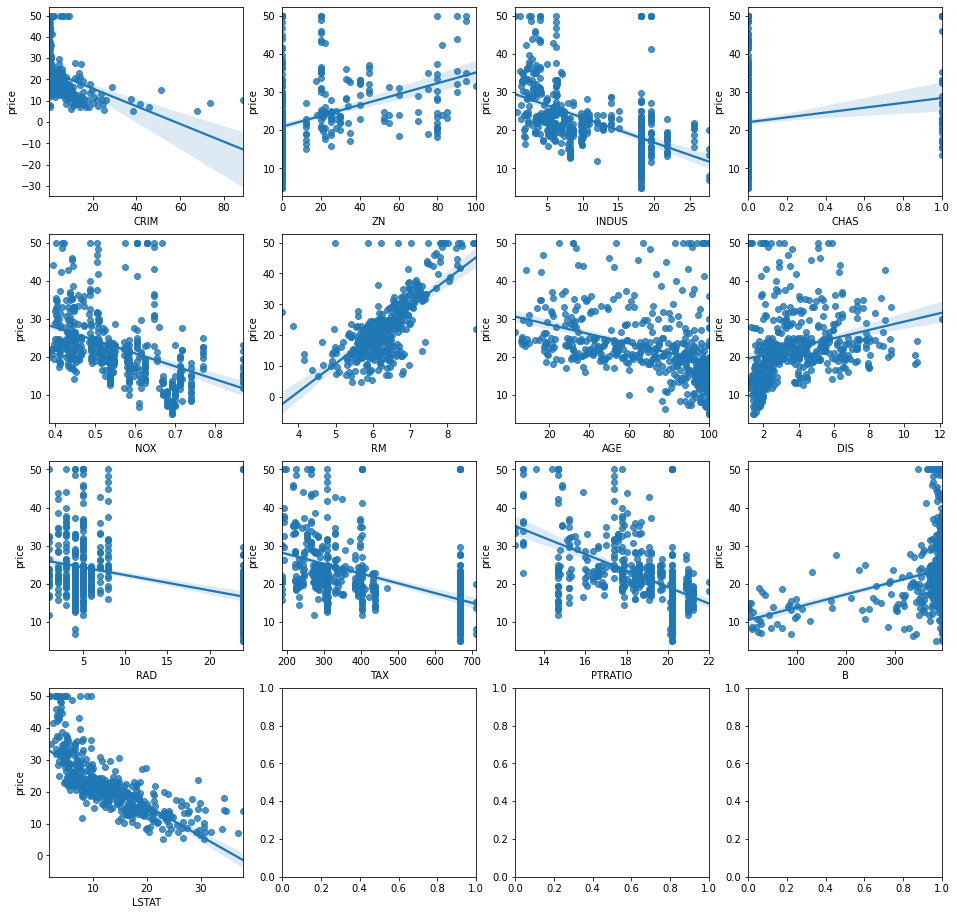

In [34]:
# 데이터 조사
# 시각화
# 2행 4열, axs는 4x2 개의 ax를 갖음
# 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
fig ,axes = plt.subplots(4,4,figsize = (16,16))
for i ,feature in enumerate(boston.feature_names):
  row = int(i/4)
  col = i%4
  sns.regplot(x = feature,y = 'price',data = df,ax = axes[row][col]) #특성별 선형성 분석 


#### LinearRegression 실습 05

유방암 데이터셋에 선형회귀 적용

In [61]:
from sklearn.datasets import load_breast_cancer
#분류 문제 
cancer = load_breast_cancer()
print(cancer.data.shape)
print(cancer.feature_names)

train_x,test_x,train_y,test_y = train_test_split(cancer.data,cancer.target,random_state = 0)

 

(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [62]:
model = LinearRegression() #회귀에 적용? label 이 숫자면 회귀 가 적용 된다.
model.fit(train_x,train_y)
model.score(train_x,train_y)

0.7824123695930644

In [63]:

model.score(test_x,test_y)

0.7291758706114018

#### LinearRegression 실습 06

확장 보스턴 집값 셋에 선형회귀 적용

In [40]:
#from sklearn.datasets import load_boston
X,y = mglearn.datasets.load_extended_boston()

#print(X)
#print(y)
train_x,test_x,train_y,test_y = train_test_split(X,y,random_state = 0)

model = LinearRegression()

model.fit(train_x,train_y)
model.score(train_x,train_y)

0.9520519609032727

In [41]:
X.shape

(506, 104)

In [42]:
'''
테스트 셋 이 더 높게 나오는 과소적합 현상 발생 randomstate = 0
'''
model.score(test_x,test_y) #과적합이 발생 

0.607472195966557

In [43]:
pred_y = model.predict(test_x)

mse = mean_squared_error(test_y,pred_y)
r2 = r2_score(test_y,pred_y)
print(mse)
print(r2)

32.069135121584615
0.607472195966557


#### LinearRegression 실습 07

붓꽃 데이터 셋에 선형회귀 적용

In [44]:
from sklearn.datasets import load_iris

#sepal 꽃밭침
#petal 꽃잎
iris = load_iris()

iris.data,iris.target #분류 문제 인데 수치화 
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


꽃받침 길이와 꽂잎 길이를 이용한 선형회귀

In [45]:
# 꽃받침 길이
x = iris.data[:,0]
# 꽃잎 너비
y = iris.data[:,2]

x.shape #항상 x모양 확인 

(150,)

In [46]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x.reshape(-1,1),y,random_state = 0)

No handles with labels found to put in legend.


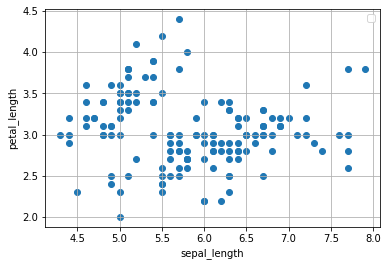

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

#두 가지 특성을 시각화 
plt.scatter(x,y)
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()
plt.grid()
plt.show()

0.0030042585383249776
0.026506510271823044


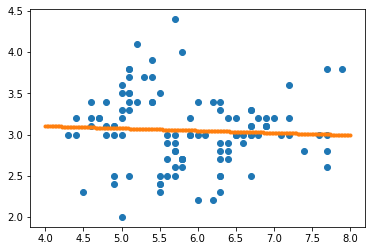

In [48]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x,train_y)

print(model.score(train_x,train_y))
print(model.score(test_x,test_y)) #과적합 

#y = [model.coef_ * train_x + model.intercept_]

plt.scatter(train_x,train_y)
xx =np.linspace(4,8,200) # 4 8 x 의 범위 , 
yy = model.coef_ * xx + model.intercept_
plt.scatter(x = xx , y = yy , marker = '.')

꽃잎 길이와 꽂잎 너비를 이용한 선형회귀

In [49]:
# 꽃잎 길이
x = iris.data[:,2]
# 꽃잎 너비
y = iris.data[:,3]

x.shape

(150,)

In [50]:
train_x,test_x,train_y,test_y = train_test_split(x.reshape(-1,1),y,random_state = 0)

model.fit(train_x,train_y)
print(model.score(train_x,train_y))
print(model.score(test_x,test_y))

0.9358824215964661
0.8931453922584154


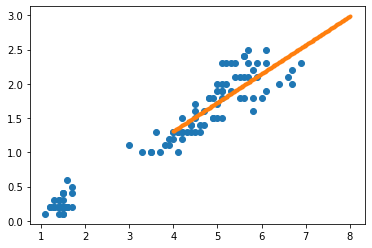

In [51]:
#두 가지 특성을 시각화
plt.scatter(train_x,train_y)
xx =np.linspace(4,8,200) # 4 8 x 의 범위 , 
yy = model.coef_ * xx + model.intercept_
plt.scatter(x = xx , y = yy , marker = '.')

In [56]:
train_x,test_x,train_y,test_y = train_test_split(x.reshape(-1,1),y,random_state = 0)

In [57]:
model = LinearRegression()
model.fit(train_x,train_y)
model.score(train_x,train_y)


0.9358824215964661

In [58]:
model.score(test_x,test_y)

0.8931453922584154

장단점

- k-NN에 비해 더 제약이 있는 것처럼 보이지만 특성이 많은 데이터셋의 경우에는 우수한 성능을 낼 수 있다.
- 모델의 복잡도를 제어할 방법이 없어 과대적합 되기 쉽다.


Next. 모델 정규화(Regularization, 규제)을 통해 과대적합을 제어